Implement L2 regularization on cat-dog classification neural network. Train the model on the
dataset, and observe the impact of the regularization on the weight parameters. (Do not use
data augmentation).
a. L2 regularization using optimizer’s weight decay
b. L2 regularization using loop to find L2 norm of weights

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2024-02-27 05:09:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.13’

cats_and_dogs_filte 100%[===================>]  65.43M   197MB/s    in 0.3s    

2024-02-27 05:09:30 (197 MB/s) - ‘cats_and_dogs_filtered.zip.13’ saved [68606236/68606236]



In [ ]:
import zipfile

zip_file = "cats_and_dogs_filtered.zip"
destination = "./"

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination)

print("Extraction completed.")

Extraction completed.


In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
import matplotlib.pyplot as plt
import glob


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


train_data = ImageFolder(root="/content/cats_and_dogs_filtered/train", transform=transform)
test_data = ImageFolder(root="/content/cats_and_dogs_filtered/validation", transform=transform)


train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32)

model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)


def train_step(model, data_loader, loss_fn, optimizer, device):
    model.train()
    train_loss = 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        l2_reg = sum(torch.norm(param)**2 for param in model.parameters())
        loss += l2_reg * 0.01
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    return train_loss


def test_step(model, data_loader, loss_fn, device):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    test_loss /= len(data_loader)
    accuracy = correct / total
    return test_loss, accuracy


num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}:")
    train_loss = train_step(model, train_loader, loss_fn, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}")
    test_loss, accuracy = test_step(model, test_loader, loss_fn, device)
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10:
Train Loss: 8.0113
Test Loss: 0.6932, Accuracy: 0.4830
Epoch 2/10:
Train Loss: 1.1220
Test Loss: 0.6929, Accuracy: 0.5000
Epoch 3/10:
Train Loss: 0.9304
Test Loss: 0.6930, Accuracy: 0.5000
Epoch 4/10:
Train Loss: 0.8352
Test Loss: 0.6950, Accuracy: 0.5000
Epoch 5/10:
Train Loss: 0.8786
Test Loss: 0.6952, Accuracy: 0.5000
Epoch 6/10:
Train Loss: 0.8196
Test Loss: 0.6929, Accuracy: 0.5000
Epoch 7/10:
Train Loss: 0.7457
Test Loss: 0.6934, Accuracy: 0.5000
Epoch 8/10:
Train Loss: 0.7282
Test Loss: 0.6929, Accuracy: 0.5000
Epoch 9/10:
Train Loss: 0.7182
Test Loss: 0.6945, Accuracy: 0.5000
Epoch 10/10:
Train Loss: 0.7121
Test Loss: 0.6948, Accuracy: 0.5000


2. Implement L1 regularization on cat-dog classification neural network. Train the model on the
dataset, and observe the impact of the regularization on the weight parameters. (Do not use
data augmentation).
a. L1 regularization using optimizer’s weight decay
b. L1regularization using loop to find L1 norm of weight

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
import matplotlib.pyplot as plt
import glob

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


train_data = ImageFolder(root="/content/cats_and_dogs_filtered/train", transform=transform)
test_data = ImageFolder(root="/content/cats_and_dogs_filtered/validation", transform=transform)


train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32)

model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

def train_step_l1(model, data_loader, loss_fn, optimizer, device, l1_lambda=0.01):
    model.train()
    train_loss = 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        l1_reg = sum(torch.norm(param, p=1) for param in model.parameters())
        loss += l1_reg * l1_lambda
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    return train_loss

def test_step(model, data_loader, loss_fn, device):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    test_loss /= len(data_loader)
    accuracy = correct / total
    return test_loss, accuracy

num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}:")
    train_loss = train_step_l1(model, train_loader, loss_fn, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}")
    test_loss, accuracy = test_step(model, test_loader, loss_fn, device)
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10:
Train Loss: 899.8121
Test Loss: 0.6933, Accuracy: 0.5000
Epoch 2/10:
Train Loss: 558.9863
Test Loss: 0.6931, Accuracy: 0.5000
Epoch 3/10:
Train Loss: 565.3466
Test Loss: 0.6929, Accuracy: 0.5000
Epoch 4/10:
Train Loss: 562.5291
Test Loss: 0.6930, Accuracy: 0.5000
Epoch 5/10:
Train Loss: 569.4126
Test Loss: 0.6937, Accuracy: 0.5000
Epoch 6/10:
Train Loss: 559.8655
Test Loss: 0.6933, Accuracy: 0.5000
Epoch 7/10:
Train Loss: 564.0906
Test Loss: 0.6942, Accuracy: 0.5000
Epoch 8/10:
Train Loss: 559.2199
Test Loss: 0.6933, Accuracy: 0.5000
Epoch 9/10:
Train Loss: 566.7519
Test Loss: 0.6933, Accuracy: 0.5000
Epoch 10/10:
Train Loss: 559.5326
Test Loss: 0.6929, Accuracy: 0.5000


3. Implement dropout regularization on cat-dog classification neural network. Train the model
with and without dropout on a dataset, and compare the performance and overfitting
tendencies

Epoch 1/10, Train Loss: 0.6903, Test Loss: 0.7240, Test Accuracy: 0.5000
Epoch 2/10, Train Loss: 0.6673, Test Loss: 0.6541, Test Accuracy: 0.6380
Epoch 3/10, Train Loss: 0.6156, Test Loss: 0.6284, Test Accuracy: 0.6420
Epoch 4/10, Train Loss: 0.5688, Test Loss: 0.5998, Test Accuracy: 0.6920
Epoch 5/10, Train Loss: 0.5308, Test Loss: 0.5928, Test Accuracy: 0.6930
Epoch 6/10, Train Loss: 0.5196, Test Loss: 0.6010, Test Accuracy: 0.6890
Epoch 7/10, Train Loss: 0.4807, Test Loss: 0.6724, Test Accuracy: 0.6230
Epoch 8/10, Train Loss: 0.4526, Test Loss: 0.5880, Test Accuracy: 0.7070
Epoch 9/10, Train Loss: 0.4164, Test Loss: 0.6447, Test Accuracy: 0.6940
Epoch 10/10, Train Loss: 0.3792, Test Loss: 0.5863, Test Accuracy: 0.7000


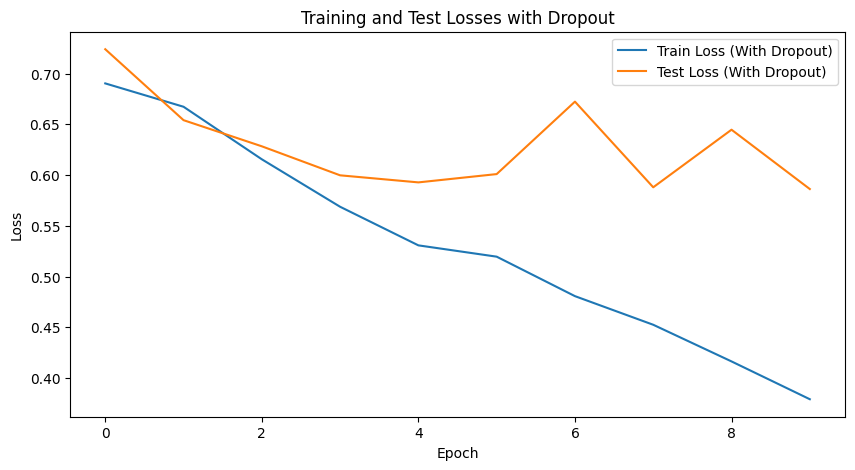

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
import matplotlib.pyplot as plt

class CNNWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_data = ImageFolder(root="/content/cats_and_dogs_filtered/train", transform=transform)
test_data = ImageFolder(root="/content/cats_and_dogs_filtered/validation", transform=transform)

train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32)

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        test_loss = 0.0
        accuracy = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                accuracy += (predicted == labels).sum().item()
        test_loss = test_loss / len(test_loader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy/len(test_data):.4f}")

    return train_losses, test_losses

model_with_dropout = CNNWithDropout()
criterion = nn.CrossEntropyLoss()
optimizer_with_dropout = torch.optim.Adam(model_with_dropout.parameters(), lr=0.0001)

train_losses_with_dropout, test_losses_with_dropout = train_model(model_with_dropout, train_loader, test_loader, criterion, optimizer_with_dropout)

plt.figure(figsize=(10, 5))
plt.plot(train_losses_with_dropout, label='Train Loss (With Dropout)')
plt.plot(test_losses_with_dropout, label='Test Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses with Dropout')
plt.legend()
plt.show()


4. Implement your own version of the dropout layer by using Bernoulli distribution and compare
the performance with the library.

In [ ]:
import torch
import torch.nn as nn

class CustomDropout(nn.Module):
    def __init__(self, p=0.5):
        super(CustomDropout, self).__init__()
        self.p = p

    def forward(self, x):
        if self.training:
            mask = torch.bernoulli(torch.full_like(x, 1 - self.p))
            output = x * mask / (1 - self.p)
        else:
            output = x * (1 - self.p)
        return output

dropout_layer = CustomDropout(p=0.5)
x = torch.randn(2, 3, 4, 4)
output = dropout_layer(x)
print(output)

tensor([[[[-0.2872, -1.1377, -1.1612,  1.9613],
          [ 0.0000,  0.0000, -0.0000,  0.0000],
          [-2.3189, -3.8154, -2.5836,  0.0000],
          [ 0.0000,  1.8471, -0.0000,  0.0000]],

         [[-2.5287, -1.4592, -0.0000, -0.0000],
          [ 0.0000,  3.2851, -0.0000,  1.0238],
          [ 0.0000,  1.0264,  0.0000,  0.0000],
          [-0.0000,  1.1687, -0.0000,  0.3242]],

         [[-1.8436,  2.5136,  4.2399, -0.1367],
          [ 0.0000,  0.0000,  2.7849, -1.6609],
          [ 0.0000, -1.8791,  0.0000, -0.0000],
          [-0.0000, -0.0000, -4.3590,  0.4563]]],


        [[[-2.1139, -0.0000, -1.3761, -0.0000],
          [ 2.4361, -0.0000, -1.0406, -0.6582],
          [ 0.8037, -1.3843,  3.5924,  1.3581],
          [ 0.0000,  1.2636, -0.0000, -0.5952]],

         [[-0.0000, -5.0501, -0.5412, -0.0000],
          [ 0.1537,  0.0000,  1.1319,  0.0000],
          [ 0.0000,  3.0158,  1.8334,  0.0000],
          [ 2.3621,  0.0000, -1.2164,  5.3314]],

         [[ 1.9103, -0.0728,